In [1]:
import numpy as np
import numpy.matlib
import time
from scipy import misc
import imageio
import matplotlib.pyplot as plt

import sys
sys.path.append('../lib/')
import utils.bbox as bbox   
from dataflow.detectiondb import DetectionDB
from utils.viz import draw_bounding_box
import model.anchor as anchor

In [2]:
im_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/JPEGImages/'
xml_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/Annotations/'
db = DetectionDB('jpg', im_path, xml_path, num_channel=3, rescale=600)


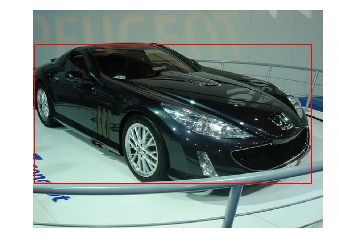

In [15]:
batch_data = db.next_batch()
db._im_list[db._data_id-1]
im = batch_data[0][0]
gt_bbox = batch_data[1][0]
draw_bounding_box(im, gt_bbox)



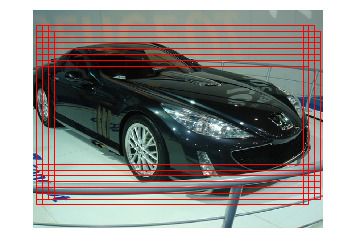

In [18]:
im_h, im_w = im.shape[0], im.shape[1]
pos_box, neg_box, pos_position, neg_position, mask, label_map = anchor.anchor_training_samples(
        im_w, im_h, gt_bbox, stride=16, pos_thr=0.7, neg_thr=0.3, num_sample=128)
draw_bounding_box(im, pos_box)


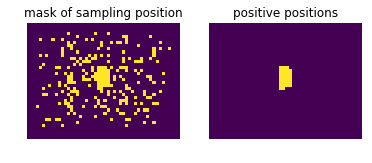

In [17]:
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(mask)
axarr[0].set_title('mask of sampling position')
axarr[0].axis('off')

axarr[1].imshow(label_map)
axarr[1].set_title('positive positions')
axarr[1].axis('off')

plt.show()